In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading data into a dataframe named df, a copy is made later and saved as data. We will work on dataframe data leaving df untouched.

In [3]:
#Read the data and save it in a dataframe called df
df = pd.read_csv("./Data/New_Price_Change_Monitoring_System.csv")

#read the first 5 rows
df.head()

,date_scraped,page_number,product_url,image,current_price,title,brand,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 499,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,NaN,"KSh 1,399",64%,(3867 verified ratings),4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 719,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",NaN,"KSh 1,200",40%,(557 verified ratings),3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets
2,2025-09-14,1,https://www.jumia.co.ke/samsung-galaxy-a05-6.7...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,"KSh 8,900","Samsung Galaxy A05, 6.7"", 64GB + 4GB RAM (Dual...",NaN,"KSh 13,187",33%,(523 verified ratings),4.1,LOFFEL ELECTRONICS LIMITED - AC,Phones & Tablets
3,2025-09-14,1,https://www.jumia.co.ke/ailyons-afk-111-water-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,"KSh 2,599",AILYONS AFK-111 Water Dispenser Hot And Normal...,NaN,"KSh 4,999",48%,(2092 verified ratings),3.9,UR-HOME(KENYA),Home & Office
4,2025-09-14,1,https://www.jumia.co.ke/fashion-couple-canvas-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 699 - KSh 729,Couple Canvas Low Top Lace-up Shoes Classic Ca...,NaN,"KSh 1,200 - KSh 1,500",53%,(734 verified ratings),4.2,Waanzilish,Fashion


In [4]:
#Make a copy and save it as data. we will work on data, and leave df as the original untouched dataframe.
data=df.copy()
data.head()

,date_scraped,page_number,product_url,image,current_price,title,brand,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 499,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,NaN,"KSh 1,399",64%,(3867 verified ratings),4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 719,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",NaN,"KSh 1,200",40%,(557 verified ratings),3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets
2,2025-09-14,1,https://www.jumia.co.ke/samsung-galaxy-a05-6.7...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,"KSh 8,900","Samsung Galaxy A05, 6.7"", 64GB + 4GB RAM (Dual...",NaN,"KSh 13,187",33%,(523 verified ratings),4.1,LOFFEL ELECTRONICS LIMITED - AC,Phones & Tablets
3,2025-09-14,1,https://www.jumia.co.ke/ailyons-afk-111-water-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,"KSh 2,599",AILYONS AFK-111 Water Dispenser Hot And Normal...,NaN,"KSh 4,999",48%,(2092 verified ratings),3.9,UR-HOME(KENYA),Home & Office
4,2025-09-14,1,https://www.jumia.co.ke/fashion-couple-canvas-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 699 - KSh 729,Couple Canvas Low Top Lace-up Shoes Classic Ca...,NaN,"KSh 1,200 - KSh 1,500",53%,(734 verified ratings),4.2,Waanzilish,Fashion


In [5]:
#check the number of rows and columns
data.shape

(1999, 13)

In [6]:
#Check for missing values, datatypes.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_scraped      1999 non-null   object 
 1   page_number       1999 non-null   int64  
 2   product_url       1999 non-null   object 
 3   image             1999 non-null   object 
 4   current_price     1999 non-null   object 
 5   title             1999 non-null   object 
 6   brand             0 non-null      float64
 7   original_price    1798 non-null   object 
 8   discount          1798 non-null   object 
 9   verified_ratings  1549 non-null   object 
 10  rating_number     1999 non-null   float64
 11  seller            1999 non-null   object 
 12  main_category     1999 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 203.1+ KB


In [7]:
#Drop brand since the column is empty
data = data.drop(columns=['brand'], errors='ignore')
data.shape

(1999, 12)

### Data Cleaning

In [15]:
# 2. Clean current_price & original_price. make them numeric
def clean_price(x):
    if pd.isna(x):
        return np.nan
    x = str(x).replace("KSh", "").replace(",", "").strip()
    if "-" in x:  # handle ranges like "699 - 729" It will take the average of the two
        parts = x.split("-")
        nums = [float(p.strip()) for p in parts if p.strip().replace('.', '', 1).isdigit()]
        return np.mean(nums) if nums else np.nan
    return float(x) if x.replace('.', '', 1).isdigit() else np.nan

data['current_price'] = data['current_price'].apply(clean_price)
data['original_price'] = data['original_price'].apply(clean_price)
data.head()

,date_scraped,page_number,product_url,image,current_price,title,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,499.0,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,1399.0,64%,(3867 verified ratings),4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,719.0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",1200.0,40%,(557 verified ratings),3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets
2,2025-09-14,1,https://www.jumia.co.ke/samsung-galaxy-a05-6.7...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,8900.0,"Samsung Galaxy A05, 6.7"", 64GB + 4GB RAM (Dual...",13187.0,33%,(523 verified ratings),4.1,LOFFEL ELECTRONICS LIMITED - AC,Phones & Tablets
3,2025-09-14,1,https://www.jumia.co.ke/ailyons-afk-111-water-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,2599.0,AILYONS AFK-111 Water Dispenser Hot And Normal...,4999.0,48%,(2092 verified ratings),3.9,UR-HOME(KENYA),Home & Office
4,2025-09-14,1,https://www.jumia.co.ke/fashion-couple-canvas-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,714.0,Couple Canvas Low Top Lace-up Shoes Classic Ca...,1350.0,53%,(734 verified ratings),4.2,Waanzilish,Fashion


In [17]:
#Clean discount, remove %
data['discount'] = data['discount'].str.replace('%', '', regex=False)
data.head(2)

,date_scraped,page_number,product_url,image,current_price,title,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,499.0,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,1399.0,64,(3867 verified ratings),4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,719.0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",1200.0,40,(557 verified ratings),3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets


In [19]:
#Clean verified_ratings. Extract numeric value from the sring.
data['verified_ratings'] = (
    data['verified_ratings']
    .str.extract(r'(\d+)')
    .astype(float)
)
data.head(2)

,date_scraped,page_number,product_url,image,current_price,title,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,499.0,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,1399.0,64,3867.0,4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,719.0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",1200.0,40,557.0,3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets


### Handling Missing Values

In [22]:
#Recheck missing values
data.isna().sum()

date_scraped          0
page_number           0
product_url           0
image                 0
current_price         0
title                 0
original_price      201
discount            201
verified_ratings    488
rating_number         0
seller                0
main_category         0
dtype: int64

In [24]:
# For original_price, the missing value is set equal to current_price (assume no discount)
data['original_price'] = data['original_price'].fillna(data['current_price'])
data.isna().sum()

date_scraped          0
page_number           0
product_url           0
image                 0
current_price         0
title                 0
original_price        0
discount            201
verified_ratings    488
rating_number         0
seller                0
main_category         0
dtype: int64

In [26]:
# Discount, we filled missing values with 0
data['discount'] = data['discount'].fillna(0)
data.isna().sum()

date_scraped          0
page_number           0
product_url           0
image                 0
current_price         0
title                 0
original_price        0
discount              0
verified_ratings    488
rating_number         0
seller                0
main_category         0
dtype: int64

In [28]:
# verified_ratings, missing = 0
data['verified_ratings'] = data['verified_ratings'].fillna(0)
data.isna().sum()

date_scraped        0
page_number         0
product_url         0
image               0
current_price       0
title               0
original_price      0
discount            0
verified_ratings    0
rating_number       0
seller              0
main_category       0
dtype: int64

### Handling Duplicates in column product_url

In [30]:
# Count duplicates based on product_url
if 'product_url' in data.columns:
    print(data.duplicated(subset=['product_url']).sum()) # marks the first occurrence as False and only marks subsequent repeats as True

94


In [34]:
# Select only duplicated product_urls
dupes = data[data['product_url'].duplicated(keep=False)]

# Sort so that the same URLs appear next to each other
dupes = dupes.sort_values(by='product_url')

# Show just the product_url column
print(dupes['product_url'])

321     https://www.jumia.co.ke/3-in-1-rechargeable-ho...
319     https://www.jumia.co.ke/3-in-1-rechargeable-ho...
195     https://www.jumia.co.ke/ailyons-2.0-l-electric...
751     https://www.jumia.co.ke/ailyons-2.0-l-electric...
352     https://www.jumia.co.ke/airpods-pro3-bluetooth...
                              ...                        
980     https://www.jumia.co.ke/xiaomi-redmi-15c-6.9up...
887     https://www.jumia.co.ke/xiaomi-redmi-15c-6.9up...
399     https://www.jumia.co.ke/xiaomi-redmi-15c-6.9up...
1954    https://www.jumia.co.ke/xiaomi-redmi-a3x-6.71-...
594     https://www.jumia.co.ke/xiaomi-redmi-a3x-6.71-...
Name: product_url, Length: 187, dtype: object


In [36]:
print(len(dupes)) # marks all duplicates as True, including the first occurrence. If a product_url appears 3 times, all 3 rows are counted.

187


In [38]:
if 'product_url' in data.columns:
    # Count product_url occurrences
    url_counts = data['product_url'].value_counts()

    # Keep only duplicates
    dupes = url_counts[url_counts > 1]

    # Convert to DataFrame for the same look as before
    dupes_df = dupes.reset_index()
    dupes_df.columns = ['product_url', 'url_count']

    # Show top 10 duplicate products
    print(dupes_df.head(20))

                                          product_url  url_count
0   https://www.jumia.co.ke/derma-roller-for-beard...          3
1   https://www.jumia.co.ke/home-design-14-55-rota...          2
2   https://www.jumia.co.ke/generic-hot-sale-cloth...          2
3   https://www.jumia.co.ke/tilecc-tilecc-air-pro-...          2
4   https://www.jumia.co.ke/tcl-55-inch-smart-tv-u...          2
5   https://www.jumia.co.ke/vitron-htc4388fs-43inc...          2
6   https://www.jumia.co.ke/generic-4pcs-set-of-st...          2
7   https://www.jumia.co.ke/tecno-spark-40-6.67-hd...          2
8   https://www.jumia.co.ke/fashion-student-backpa...          2
9   https://www.jumia.co.ke/xiaomi-redmi-15c-6.9up...          2
10  https://www.jumia.co.ke/redmi-note-14-pro-256g...          2
11  https://www.jumia.co.ke/top-fry-top-fry-vegeta...          2
12  https://www.jumia.co.ke/nivea-radiant-beauty-a...          2
13  https://www.jumia.co.ke/generic-led-2.4g-recha...          2
14  https://www.jumia.co.

In [40]:
# Drop duplicate product URLs (keep the first occurrence)
if 'product_url' in data.columns:
    data = data.drop_duplicates(subset=['product_url'], keep='first')
data.shape

(1905, 12)

In [42]:
data.head()

,date_scraped,page_number,product_url,image,current_price,title,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,499.0,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,1399.0,64,3867.0,4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,719.0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",1200.0,40,557.0,3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets
2,2025-09-14,1,https://www.jumia.co.ke/samsung-galaxy-a05-6.7...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,8900.0,"Samsung Galaxy A05, 6.7"", 64GB + 4GB RAM (Dual...",13187.0,33,523.0,4.1,LOFFEL ELECTRONICS LIMITED - AC,Phones & Tablets
3,2025-09-14,1,https://www.jumia.co.ke/ailyons-afk-111-water-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,2599.0,AILYONS AFK-111 Water Dispenser Hot And Normal...,4999.0,48,2092.0,3.9,UR-HOME(KENYA),Home & Office
4,2025-09-14,1,https://www.jumia.co.ke/fashion-couple-canvas-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,714.0,Couple Canvas Low Top Lace-up Shoes Classic Ca...,1350.0,53,734.0,4.2,Waanzilish,Fashion


### Outliers Based on main_category

In [46]:
numeric_cols = ['current_price', 'original_price', 'verified_ratings']

# Loop through numeric columns and detect outliers within each main_category
for col in numeric_cols:
    print(f"\nChecking outliers for column: {col}\n")
    for category, group in data.groupby('main_category'):
        Q1 = group[col].quantile(0.25)
        Q3 = group[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        outliers = group[(group[col] < lower) | (group[col] > upper)]
        
        if not outliers.empty:
            print(f"Category: {category}, Outliers: {outliers.shape[0]}")
            display(outliers[[col, 'main_category']].head(5))  # show 5 sample rows



Checking outliers for column: current_price

Category: Automobile, Outliers: 4


,current_price,main_category
631,36999.0,Automobile
862,24000.0,Automobile
1091,12500.0,Automobile
1445,23999.0,Automobile


Category: Baby Products, Outliers: 3


,current_price,main_category
1005,7500.0,Baby Products
1242,1698.0,Baby Products
1776,2000.0,Baby Products


Category: Books, Movies and Music, Outliers: 2


,current_price,main_category
934,12000.0,"Books, Movies and Music"
976,2999.0,"Books, Movies and Music"


Category: Computing, Outliers: 19


,current_price,main_category
203,39999.0,Computing
210,15999.0,Computing
233,28499.0,Computing
615,67860.0,Computing
676,11470.0,Computing


Category: Electronics, Outliers: 3


,current_price,main_category
928,44990.0,Electronics
1049,52999.0,Electronics
1753,44890.0,Electronics


Category: Fashion, Outliers: 17


,current_price,main_category
54,3445.0,Fashion
165,2399.0,Fashion
200,5500.0,Fashion
340,2949.0,Fashion
444,3949.5,Fashion


Category: Gaming, Outliers: 1


,current_price,main_category
949,3750.0,Gaming


Category: Garden & Outdoors, Outliers: 2


,current_price,main_category
538,40000.0,Garden & Outdoors
739,29299.0,Garden & Outdoors


Category: Grocery, Outliers: 1


,current_price,main_category
1875,3499.0,Grocery


Category: Health & Beauty, Outliers: 30


,current_price,main_category
43,3647.0,Health & Beauty
167,2873.0,Health & Beauty
217,5200.0,Health & Beauty
300,2824.0,Health & Beauty
427,3300.0,Health & Beauty


Category: Home & Office, Outliers: 58


,current_price,main_category
12,6999.0,Home & Office
16,8799.0,Home & Office
36,16999.0,Home & Office
39,17499.0,Home & Office
55,23599.0,Home & Office


Category: Industrial & Scientific, Outliers: 2


,current_price,main_category
239,14999.0,Industrial & Scientific
699,21199.0,Industrial & Scientific


Category: Musical Instruments, Outliers: 1


,current_price,main_category
1066,30990.0,Musical Instruments


Category: Pet Supplies, Outliers: 2


,current_price,main_category
915,3780.0,Pet Supplies
1680,5900.0,Pet Supplies


Category: Phones & Tablets, Outliers: 8


,current_price,main_category
916,33190.0,Phones & Tablets
1162,32399.0,Phones & Tablets
1228,32489.0,Phones & Tablets
1460,45599.0,Phones & Tablets
1552,32585.0,Phones & Tablets


Category: Sporting Goods, Outliers: 4


,current_price,main_category
601,98999.0,Sporting Goods
659,9990.0,Sporting Goods
701,11999.0,Sporting Goods
1092,12299.0,Sporting Goods


Category: Toys & Games, Outliers: 7


,current_price,main_category
657,16199.0,Toys & Games
672,8999.0,Toys & Games
929,37999.0,Toys & Games
1360,13000.0,Toys & Games
1646,6999.0,Toys & Games



Checking outliers for column: original_price

Category: Automobile, Outliers: 3


,original_price,main_category
631,85810.0,Automobile
862,32000.0,Automobile
1445,35000.0,Automobile


Category: Baby Products, Outliers: 1


,original_price,main_category
1005,8500.0,Baby Products


Category: Books, Movies and Music, Outliers: 2


,original_price,main_category
934,12000.0,"Books, Movies and Music"
976,2999.0,"Books, Movies and Music"


Category: Computing, Outliers: 20


,original_price,main_category
121,19000.0,Computing
203,45000.0,Computing
210,25000.0,Computing
233,35000.0,Computing
615,135720.0,Computing


Category: Electronics, Outliers: 9


,original_price,main_category
559,100000.0,Electronics
667,110000.0,Electronics
733,100000.0,Electronics
737,80000.0,Electronics
928,110000.0,Electronics


Category: Fashion, Outliers: 16


,original_price,main_category
165,4449.0,Fashion
200,7500.0,Fashion
261,4124.0,Fashion
303,3600.0,Fashion
340,4849.0,Fashion


Category: Gaming, Outliers: 1


,original_price,main_category
949,7500.0,Gaming


Category: Garden & Outdoors, Outliers: 1


,original_price,main_category
739,55000.0,Garden & Outdoors


Category: Grocery, Outliers: 2


,original_price,main_category
891,2599.0,Grocery
1875,5500.0,Grocery


Category: Health & Beauty, Outliers: 20


,original_price,main_category
43,5610.0,Health & Beauty
167,4420.0,Health & Beauty
217,6500.0,Health & Beauty
300,4345.0,Health & Beauty
427,5500.0,Health & Beauty


Category: Home & Office, Outliers: 51


,original_price,main_category
12,11995.0,Home & Office
16,11800.0,Home & Office
36,26199.0,Home & Office
39,25399.0,Home & Office
55,23599.0,Home & Office


Category: Industrial & Scientific, Outliers: 3


,original_price,main_category
239,19000.0,Industrial & Scientific
412,11790.0,Industrial & Scientific
699,23999.0,Industrial & Scientific


Category: Musical Instruments, Outliers: 1


,original_price,main_category
1066,70000.0,Musical Instruments


Category: Pet Supplies, Outliers: 2


,original_price,main_category
915,3780.0,Pet Supplies
1680,5999.0,Pet Supplies


Category: Phones & Tablets, Outliers: 10


,original_price,main_category
916,60000.0,Phones & Tablets
1162,50000.0,Phones & Tablets
1434,50999.0,Phones & Tablets
1460,65000.0,Phones & Tablets
1588,60999.0,Phones & Tablets


Category: Sporting Goods, Outliers: 4


,original_price,main_category
601,170000.0,Sporting Goods
659,19000.0,Sporting Goods
701,21598.0,Sporting Goods
1092,21998.0,Sporting Goods


Category: Toys & Games, Outliers: 7


,original_price,main_category
657,21999.0,Toys & Games
672,11999.0,Toys & Games
929,49999.0,Toys & Games
1360,15500.0,Toys & Games
1646,14900.0,Toys & Games



Checking outliers for column: verified_ratings

Category: Automobile, Outliers: 7


,verified_ratings,main_category
459,19.0,Automobile
473,17.0,Automobile
1083,19.0,Automobile
1264,36.0,Automobile
1299,23.0,Automobile


Category: Baby Products, Outliers: 2


,verified_ratings,main_category
59,259.0,Baby Products
1242,36.0,Baby Products


Category: Books, Movies and Music, Outliers: 8


,verified_ratings,main_category
514,1.0,"Books, Movies and Music"
649,1.0,"Books, Movies and Music"
749,1.0,"Books, Movies and Music"
885,9.0,"Books, Movies and Music"
946,2.0,"Books, Movies and Music"


Category: Computing, Outliers: 12


,verified_ratings,main_category
107,2117.0,Computing
120,2190.0,Computing
156,631.0,Computing
270,434.0,Computing
296,373.0,Computing


Category: Electronics, Outliers: 24


,verified_ratings,main_category
8,1550.0,Electronics
14,501.0,Electronics
100,3700.0,Electronics
103,839.0,Electronics
108,298.0,Electronics


Category: Fashion, Outliers: 39


,verified_ratings,main_category
4,734.0,Fashion
13,1679.0,Fashion
18,410.0,Fashion
20,520.0,Fashion
21,884.0,Fashion


Category: Gaming, Outliers: 1


,verified_ratings,main_category
1836,69.0,Gaming


Category: Garden & Outdoors, Outliers: 5


,verified_ratings,main_category
1153,42.0,Garden & Outdoors
1222,35.0,Garden & Outdoors
1542,37.0,Garden & Outdoors
1666,49.0,Garden & Outdoors
1910,31.0,Garden & Outdoors


Category: Grocery, Outliers: 2


,verified_ratings,main_category
198,1587.0,Grocery
1224,1711.0,Grocery


Category: Health & Beauty, Outliers: 59


,verified_ratings,main_category
6,1312.0,Health & Beauty
10,1082.0,Health & Beauty
11,2165.0,Health & Beauty
15,3255.0,Health & Beauty
17,419.0,Health & Beauty


Category: Home & Office, Outliers: 60


,verified_ratings,main_category
0,3867.0,Home & Office
3,2092.0,Home & Office
5,3891.0,Home & Office
7,1164.0,Home & Office
9,1919.0,Home & Office


Category: Industrial & Scientific, Outliers: 3


,verified_ratings,main_category
565,494.0,Industrial & Scientific
754,19.0,Industrial & Scientific
1485,64.0,Industrial & Scientific


Category: Musical Instruments, Outliers: 2


,verified_ratings,main_category
1947,36.0,Musical Instruments
1986,50.0,Musical Instruments


Category: Pet Supplies, Outliers: 2


,verified_ratings,main_category
1388,27.0,Pet Supplies
1752,17.0,Pet Supplies


Category: Phones & Tablets, Outliers: 48


,verified_ratings,main_category
1,557.0,Phones & Tablets
2,523.0,Phones & Tablets
99,4080.0,Phones & Tablets
101,2866.0,Phones & Tablets
104,296.0,Phones & Tablets


Category: Sporting Goods, Outliers: 1


,verified_ratings,main_category
1209,195.0,Sporting Goods


Category: Toys & Games, Outliers: 4


,verified_ratings,main_category
58,104.0,Toys & Games
348,50.0,Toys & Games
541,8.0,Toys & Games
748,8.0,Toys & Games


### Numeric columns & Correlations computation

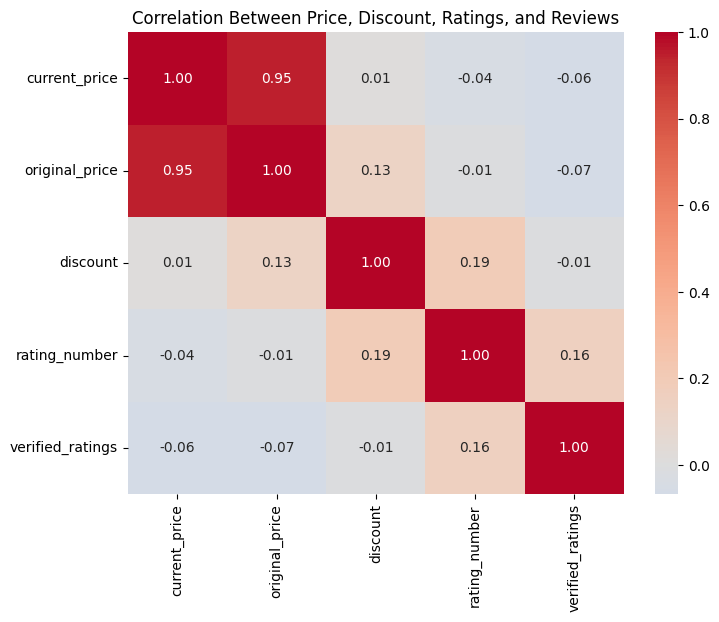

In [48]:
# Select relevant numeric columns
num_cols = ['current_price', 'original_price', 'discount', 'rating_number', 'verified_ratings']

corr = data[num_cols].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Between Price, Discount, Ratings, and Reviews")
plt.show()


#### This shows which features are positively/negatively correlated with current_price.

- High positive correlation with original_price : current price is usually derived from the original price (discounted).

- Correlation with discount : Discounts don’t strongly drive prices. This matches what we saw in scatterplots — discounts are more about marketing than actual price level.

- Correlations with ratings or reviews : More expensive products don’t necessarily get higher ratings or more reviews. In fact, popularity tends to be for cheaper items, confirming what we saw earlier.

- Discount vs Ratings / Reviews : Slight tendency for discounted products to attract more ratings, but the effect is very small.

- Ratings vs Reviews : Makes sense, products with many reviews tend to also have higher rating averages, though not strongly.

### % of Competitive Products per Category

In [57]:
# Compute median price per category
category_medians = data.groupby('main_category')['current_price'].median()

# Define competitive product
data['competitive'] = data.apply(
    lambda row: 1 if (row['current_price'] <= category_medians[row['main_category']]) 
                   and (row['rating_number'] >= 4.0) 
                else 0, axis=1
)


In [59]:
competitive_summary = data.groupby('main_category')['competitive'].mean() * 100
print(competitive_summary.sort_values(ascending=False))

main_category
Grocery                    47.058824
Computing                  32.673267
Sporting Goods             31.250000
Automobile                 29.729730
Gaming                     28.571429
Home & Office              28.165375
Health & Beauty            26.506024
Industrial & Scientific    26.086957
Baby Products              23.076923
Toys & Games               19.512195
Electronics                18.539326
Pet Supplies               18.181818
Garden & Outdoors          16.279070
Fashion                    14.245014
Phones & Tablets           13.636364
Books, Movies and Music    12.280702
Musical Instruments         0.000000
Name: competitive, dtype: float64


We needed to know how products are well priced and rated compared to others in the same category.
- For the price, median is a good measure of a “typical” price in each category. Using category-specific medians allows us to normalize comparisons across categories.
- For rating we choose a high rate (≥ 4.0) to count as competitive.
This combination balances **value for money** and **customer satisfaction.**

### This is what the results mean for Grocery, Phones & Tablets, and Musical Instruments:
**Grocery (47%)**
- Nearly half of grocery items meet the competitive criteria.
- This reflects a price-sensitive, crowded market where many sellers offer affordable, well-rated items.

**Phones & Tablets (14%)**
- Very few products are competitive.
- This market is premium-driven: many devices are above median price, and only a small fraction combine affordability with strong ratings.
  
**Musical Instruments (0%)**
- No products met the competitive definition.
- Likely because this is a specialized niche market with high prices and fewer ratings.

### Relationship Between Price and  Discount, Ratings, & Reviews Using Graph

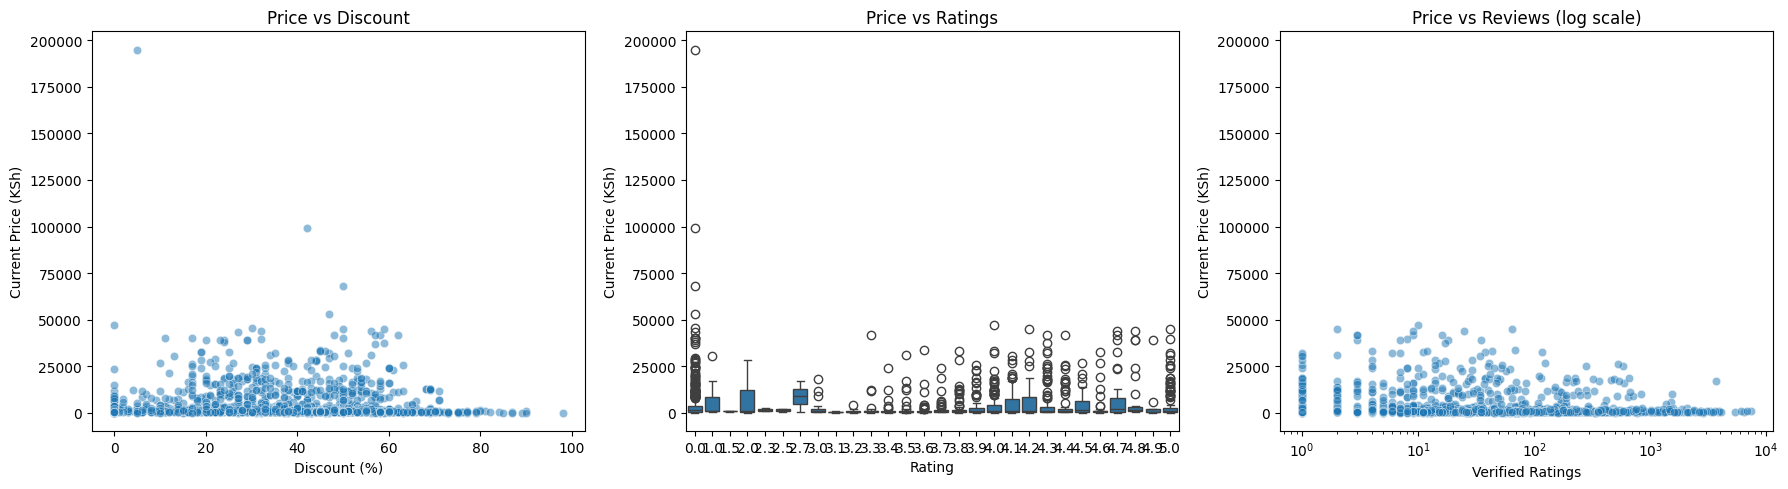

In [72]:
# Ensure numeric types
data['discount'] = pd.to_numeric(data['discount'], errors='coerce')
data['current_price'] = pd.to_numeric(data['current_price'], errors='coerce')
data['verified_ratings'] = pd.to_numeric(data['verified_ratings'], errors='coerce')
data['rating_number'] = pd.to_numeric(data['rating_number'], errors='coerce')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,5))

# 1. Price vs Discount
plt.subplot(1,3,1)
sns.scatterplot(data=data, x='discount', y='current_price', alpha=0.5)
plt.title("Price vs Discount")
plt.xlabel("Discount (%)")
plt.ylabel("Current Price (KSh)")

# 2. Price vs Ratings
plt.subplot(1,3,2)
sns.boxplot(data=data, x='rating_number', y='current_price')
plt.title("Price vs Ratings")
plt.xlabel("Rating")
plt.ylabel("Current Price (KSh)")

# 3. Price vs Reviews
plt.subplot(1,3,3)
sns.scatterplot(data=data, x='verified_ratings', y='current_price', alpha=0.5)
plt.xscale("log")   # reviews are often skewed
plt.title("Price vs Reviews (log scale)")
plt.xlabel("Verified Ratings")
plt.ylabel("Current Price (KSh)")

plt.tight_layout()
plt.show()


We did the visualizations because we wanted to understand the relationships between Price and other key factors:

- Discount (% off from original price)
- Ratings (quality perception from customers)
- Reviews (Verified Ratings) (popularity or trust from customer activity)
The relationship help us know if:
- bigger discounts actually lower prices.
- higher-rated products are priced differently
- popular items with many reviews sell at higher or lower prices
This is critical for modeling & business insights, since price is central to competitiveness.
### Interpretation of the graphs
- Discounts are mostly applied to low/mid-priced products; discounts don’t directly correlate with higher prices.
- Price doesn’t strongly depend on the rating score. A highly rated product isn’t necessarily more expensive; cheap products can also get high ratings.
- Products with many reviews are usually affordable and accessible items, not premium/high-price ones. Popularity tends to go hand-in-hand with affordability.